In [57]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Set path ke dataset
file_path = '/content/drive/MyDrive/vehicle-sales/car_prices_cleaned.csv'

# Load data
df = pd.read_csv(file_path)

# Konversi kolom saledate ke datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')

# Lihat struktur awal
df.info()
df.head()

/tmp/ipython-input-58-89543467.py:8: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58784 entries, 0 to 58783
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          58784 non-null  int64  
 1   make          58784 non-null  object 
 2   model         58784 non-null  object 
 3   trim          58784 non-null  object 
 4   body          58784 non-null  object 
 5   transmission  58784 non-null  object 
 6   vin           58784 non-null  object 
 7   state         58784 non-null  object 
 8   condition     58784 non-null  float64
 9   odometer      58784 non-null  float64
 10  color         58727 non-null  object 
 11  interior      58727 non-null  object 
 12  seller        58784 non-null  object 
 13  mmr           58784 non-null  float64
 14  sellingprice  58784 non-null  float64
 15  saledate      58784 non-null  object 
 16  car_age       58784 non-null  int64  
dtypes: float64(4), int64(2), object(11)
memory usage: 7.6+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,car_age
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00,10
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00+08:00,10
2,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,2014-12-30 12:00:00+08:00,10
3,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,2014-12-16 13:00:00+08:00,11
4,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,2015-01-20 04:00:00+08:00,11


# Exploratory Data Analysis (EDA)

### 1. Visualisasi Volume Penjualan Bulanan 2014–2015 (Linechart)

In [59]:
# Slicing data antara 1 Desember 2014 dan 31 Maret 2015
# Konversi ulang kolom saledate ke format datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
start_date = '2014-12-01'
end_date = '2015-03-31'
df = df[(df['saledate'] >= start_date) & (df['saledate'] <= end_date)]
monthly_sales = df.groupby(df['saledate'].dt.to_period('M')).size()
monthly_sales.index = monthly_sales.index.to_timestamp()

/tmp/ipython-input-59-2071655604.py:7: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



/tmp/ipython-input-60-3800184194.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



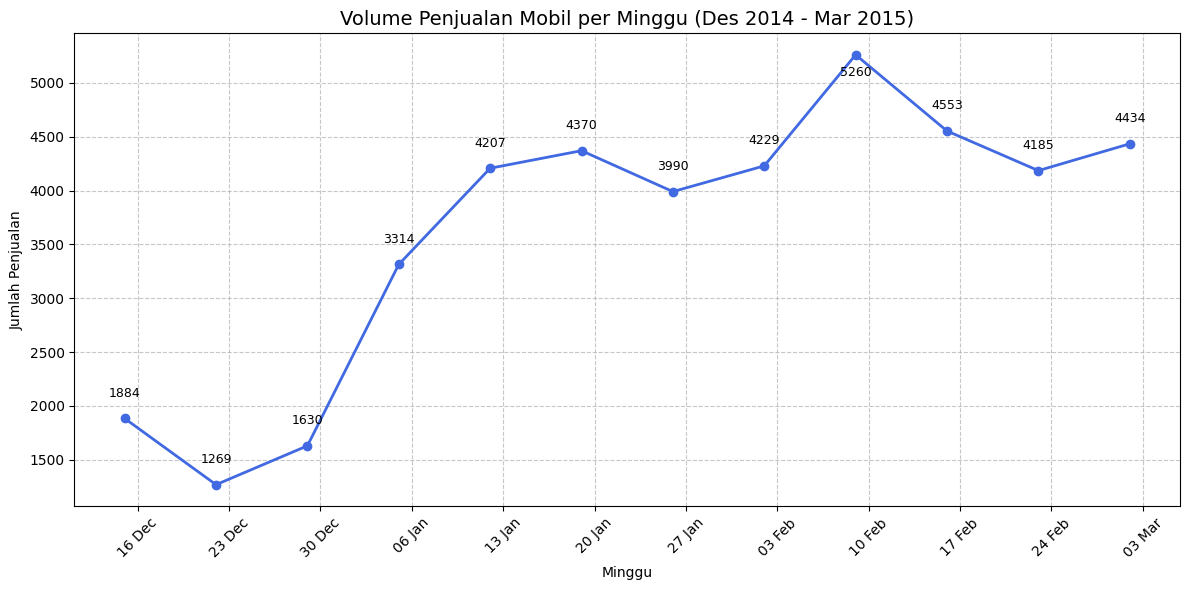

In [60]:
# Group berdasarkan minggu
weekly_sales = df.groupby(df['saledate'].dt.to_period('W')).size()
weekly_sales.index = weekly_sales.index.to_timestamp()

# Plot
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(weekly_sales.index, weekly_sales.values, marker='o', linewidth=2, color='royalblue')
ax.set_title('Volume Penjualan Mobil per Minggu (Des 2014 - Mar 2015)', fontsize=14)
ax.set_ylabel('Jumlah Penjualan')
ax.set_xlabel('Minggu')

# Format tanggal mingguan
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

# Tentukan titik maksimum
max_value = weekly_sales.max()

# Tambahkan angka secara dinamis agar tidak keluar dari garis
for x, y in zip(weekly_sales.index, weekly_sales.values):
    offset = -200 if y == max_value else 200  # letakkan label di bawah jika titik maksimum
    ax.text(x, y + offset, str(int(y)), ha='center', fontsize=9)

ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Harga Jual Rata-Rata per Bulan (Linechart)

/tmp/ipython-input-61-1096681303.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



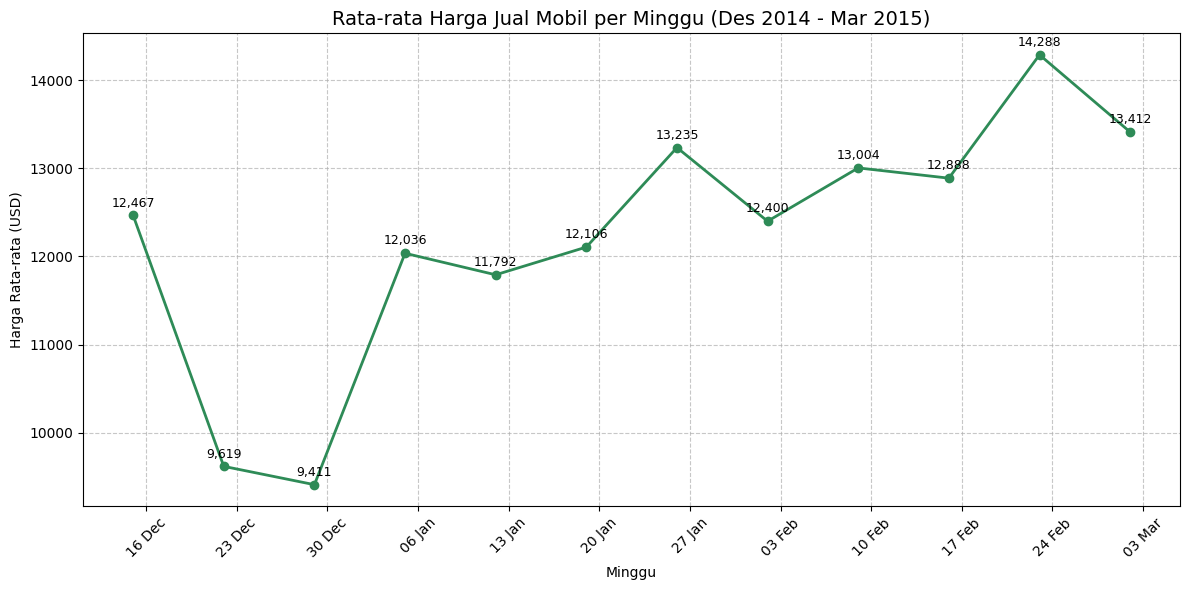

In [61]:
# Group harga rata-rata per minggu
weekly_avg_price = df.groupby(df['saledate'].dt.to_period('W'))['sellingprice'].mean()
weekly_avg_price.index = weekly_avg_price.index.to_timestamp()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(weekly_avg_price.index, weekly_avg_price.values, marker='o', linewidth=2, color='seagreen')
ax.set_title('Rata-rata Harga Jual Mobil per Minggu (Des 2014 - Mar 2015)', fontsize=14)
ax.set_ylabel('Harga Rata-rata (USD)')
ax.set_xlabel('Minggu')

# Format sumbu X
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

# Tambahkan angka
for x, y in zip(weekly_avg_price.index, weekly_avg_price.values):
    ax.text(x, y + 100, f'{int(y):,}', ha='center', fontsize=9)

ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. Heatmap State Berdasarkan Volume Penjualan

In [62]:
import plotly.graph_objects as go

# Hitung volume penjualan per state
state_sales = df['state'].value_counts().reset_index()
state_sales.columns = ['state', 'sales']
state_sales['state'] = state_sales['state'].str.upper()

# Koordinat tengah untuk setiap state (approximate)
state_centers = {
    'CA': (-119.4179, 36.7783), 'TX': (-99.9018, 31.9686), 'FL': (-81.5158, 27.6648),
    'NY': (-74.0059, 40.7128), 'PA': (-77.1945, 41.2033), 'IL': (-89.3985, 40.6331),
    'OH': (-82.9071, 40.4173), 'GA': (-82.9071, 32.1656), 'NC': (-79.0193, 35.7596),
    'MI': (-85.6024, 44.3148), 'NJ': (-74.4057, 40.0583), 'VA': (-78.6569, 37.4316),
    'WA': (-120.7401, 47.7511), 'AZ': (-111.0937, 34.0489), 'MA': (-71.3824, 42.4072),
    'TN': (-86.5804, 35.5175), 'IN': (-86.1349, 40.2672), 'MO': (-91.8318, 37.9643),
    'WI': (-89.6165, 43.7844), 'CO': (-105.7821, 39.5501), 'MN': (-94.6859, 46.7296),
    'SC': (-81.1637, 33.8361), 'AL': (-86.9023, 32.3182), 'LA': (-91.9623, 30.9843),
    'KY': (-84.2700, 37.8393), 'OR': (-120.5542, 43.8041), 'OK': (-97.0929, 35.0078),
    'CT': (-72.7554, 41.6032), 'IA': (-93.0977, 41.8780), 'NV': (-116.4194, 38.8026),
    'AR': (-92.3731, 35.2010), 'MS': (-89.3985, 32.3547), 'KS': (-98.4842, 39.0119),
    'UT': (-111.0937, 39.3200), 'NE': (-99.9018, 41.4925), 'NM': (-105.8701, 34.5199),
    'WV': (-80.4549, 38.5976), 'ID': (-114.7420, 44.0682), 'HI': (-155.5828, 19.8968),
    'ME': (-69.4455, 45.2538), 'NH': (-71.5724, 43.1939), 'RI': (-71.4774, 41.5801),
    'MT': (-110.3626, 46.8797), 'DE': (-75.5277, 38.9108), 'SD': (-99.9018, 43.9695),
    'ND': (-101.0020, 47.5515), 'VT': (-72.5778, 44.5588), 'AK': (-149.4937, 64.2008),
    'WY': (-107.2903, 43.0759), 'DC': (-77.0369, 38.9072)
}

# Peta dasar dengan warna merah
fig = go.Figure(data=go.Choropleth(
    locations=state_sales['state'],
    z=state_sales['sales'],
    locationmode='USA-states',
    colorscale='Reds',  # ✅ Ubah ke gradasi merah
    colorbar_title="Jumlah Penjualan",
))

# Tambahkan abbreviation (warna hitam agar kontras di atas merah)
for i, row in state_sales.iterrows():
    state = row['state']
    if state in state_centers:
        lon, lat = state_centers[state]
        fig.add_trace(go.Scattergeo(
            lon=[lon], lat=[lat],
            text=state,
            mode='text',
            textfont=dict(color='black', size=10),  # ✅ Font hitam
            showlegend=False
        ))

# Layout peta
fig.update_layout(
    title_text='Volume Penjualan per State (Reds + Abbreviation)',
    geo=dict(scope='usa'),
    height=600,
)
fig.show()


### 4. Top 15 Brand (Make) dengan Volume Penjualan Terbanyak

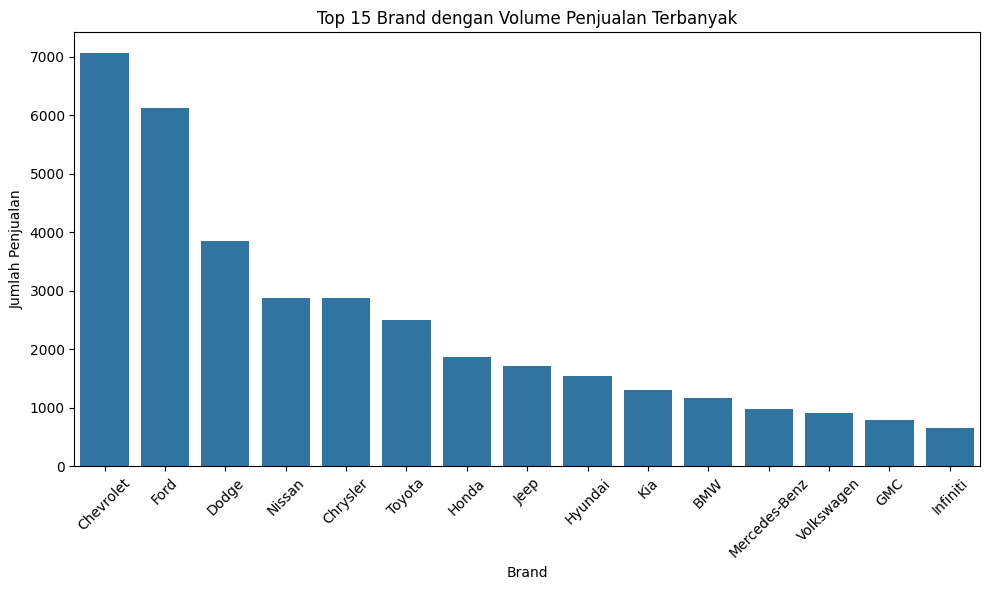

In [63]:
top_makes = df['make'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 15 Brand dengan Volume Penjualan Terbanyak')
plt.ylabel('Jumlah Penjualan')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Perbandingan Selling Price dan MMR untuk Semua Brand

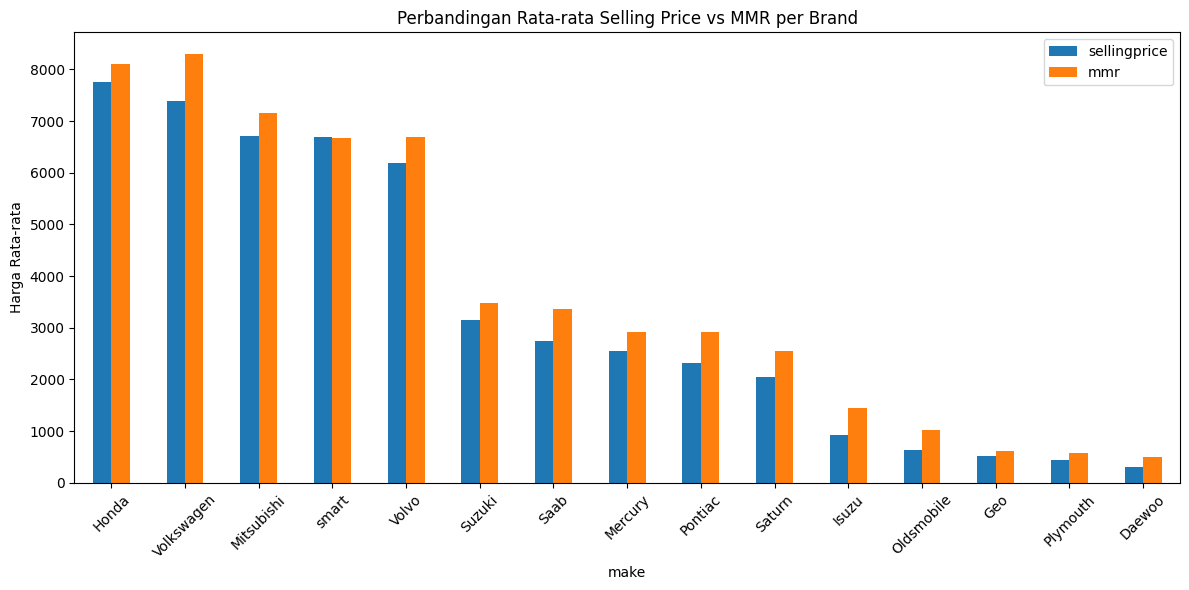

In [64]:
brand_price_compare = df.groupby('make')[['sellingprice', 'mmr']].mean().sort_values(by='sellingprice', ascending=False).tail(15)
brand_price_compare.plot(kind='bar', figsize=(12, 6), title='Perbandingan Rata-rata Selling Price vs MMR per Brand')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

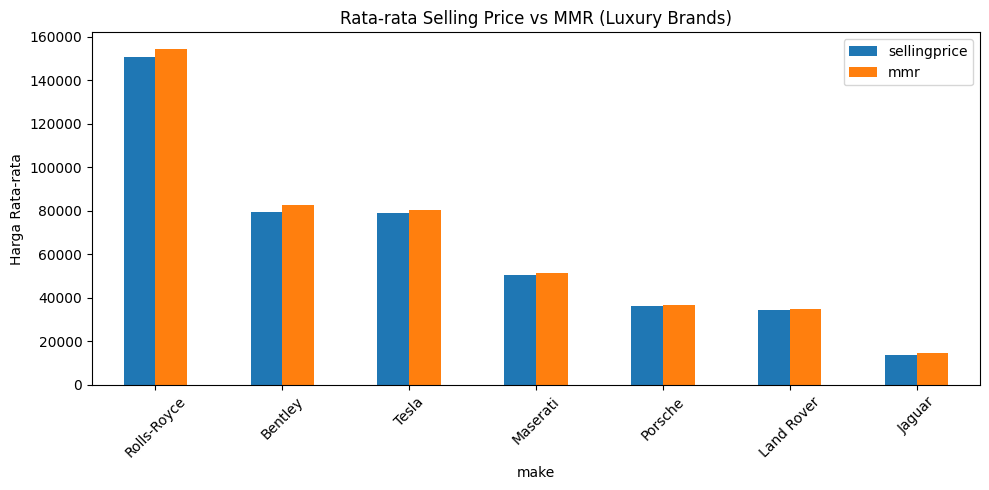

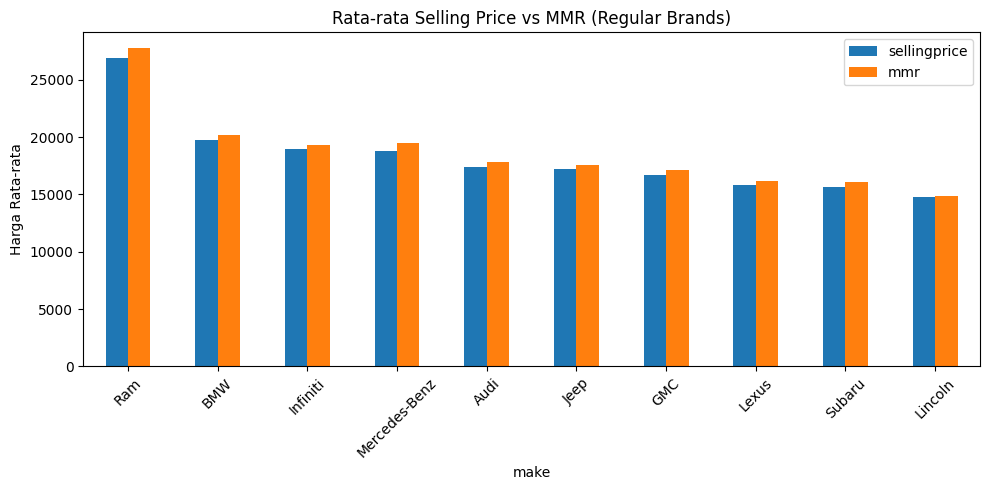

In [65]:
# Definisikan luxury brands
luxury_brands = [
    'Rolls-Royce', 'Bentley', 'Maserati', 'Porsche', 'Land Rover',
    'Jaguar', 'Ferrari', 'Lamborghini', 'Aston Martin', 'Tesla'
]

# Pisahkan luxury dan regular
df_luxury = df[df['make'].isin(luxury_brands)]
df_regular = df[~df['make'].isin(luxury_brands)]

# Hitung rata-rata selling price dan mmr per make
luxury_avg = df_luxury.groupby('make')[['sellingprice', 'mmr']].mean()
regular_avg = df_regular.groupby('make')[['sellingprice', 'mmr']].mean()

# Sortir top 10 dari masing-masing berdasarkan sellingprice
luxury_top = luxury_avg.sort_values(by='sellingprice', ascending=False).head(10)
regular_top = regular_avg.sort_values(by='sellingprice', ascending=False).head(10)

# Plot luxury brands
luxury_top.plot(kind='bar', figsize=(10, 5), title='Rata-rata Selling Price vs MMR (Luxury Brands)')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot regular brands
regular_top.plot(kind='bar', figsize=(10, 5), title='Rata-rata Selling Price vs MMR (Regular Brands)')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Perbandingan Harga dan Persentase Selisih Top 15 Brand (berdasarkan volume):

               sellingprice       mmr  %selisih
make                                           
Chevrolet          12185.05  12792.61     -4.75
Ford               13458.80  14092.12     -4.49
Dodge              12940.68  13508.49     -4.20
Nissan              9676.08  10638.29     -9.04
Chrysler           13725.42  14378.33     -4.54
Toyota             10040.69  10841.25     -7.38
Honda               7756.37   8114.65     -4.42
Jeep               17225.67  17548.11     -1.84
Hyundai             9970.64  11370.80    -12.31
Kia                11818.07  12450.44     -5.08
BMW                19777.83  20209.06     -2.13
Mercedes-Benz      18797.49  19446.87     -3.34
Volkswagen          7398.78   8303.14    -10.89
GMC                16695.07  17158.03     -2.70
Infiniti           18920.69  19263.79     -1.78


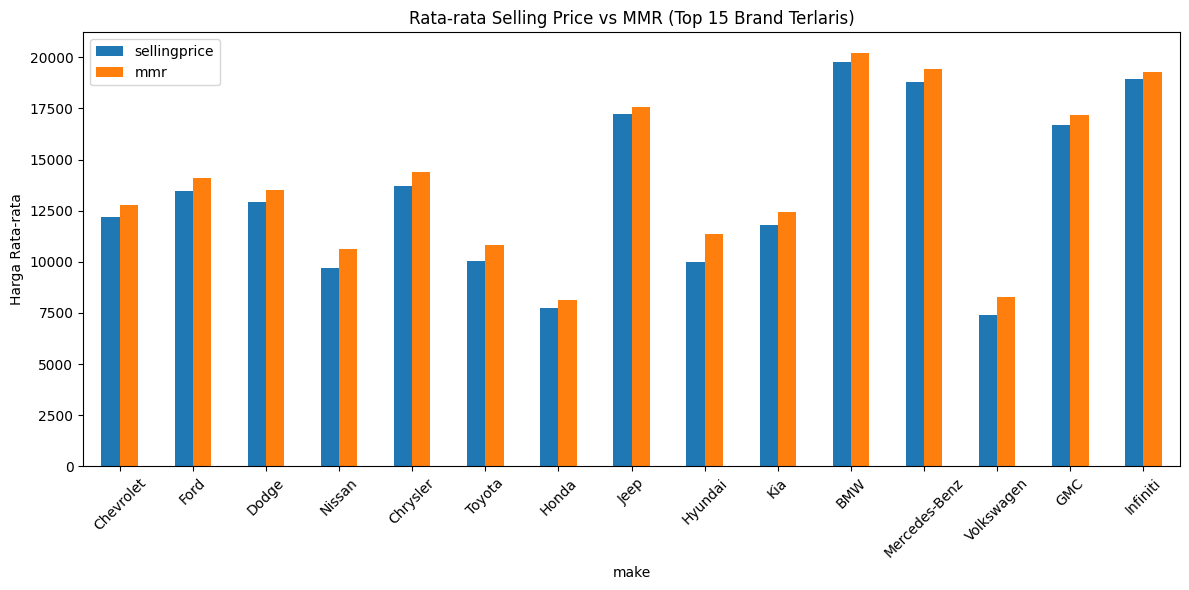

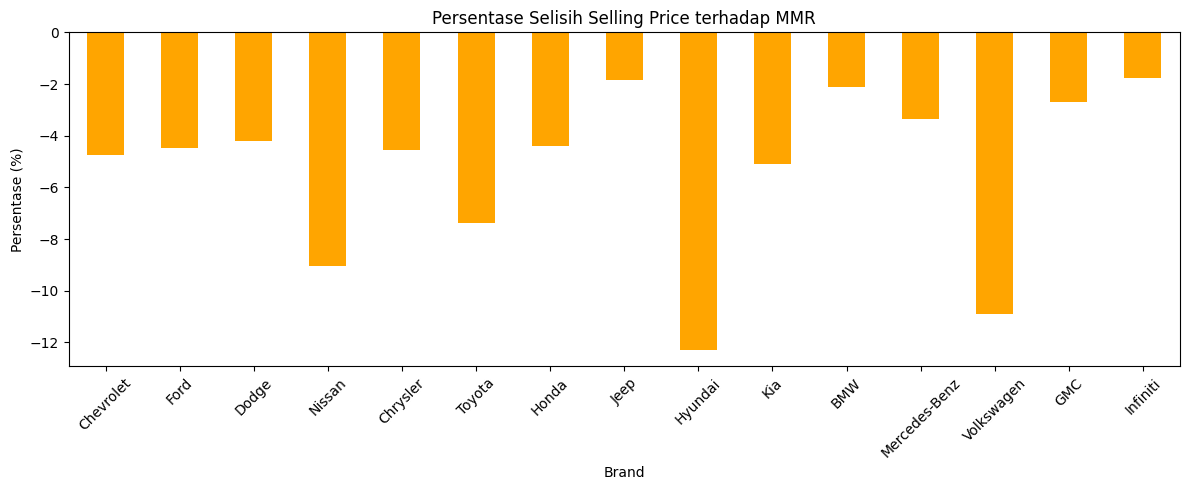

In [66]:
# Hitung top 15 brand berdasarkan volume penjualan
top_15_makes = df['make'].value_counts().head(15).index

# Filter hanya top 15
df_top = df[df['make'].isin(top_15_makes)]

# Hitung rata-rata selling price dan mmr per make
compare = df_top.groupby('make')[['sellingprice', 'mmr']].mean()

# Hitung persentase selisih harga
compare['%selisih'] = ((compare['sellingprice'] - compare['mmr']) / compare['mmr']) * 100

# Urutkan sesuai volume penjualan
compare = compare.loc[top_15_makes]

# Tampilkan tabel
print("Perbandingan Harga dan Persentase Selisih Top 15 Brand (berdasarkan volume):\n")
print(compare.round(2))

# Visualisasi Selling Price vs MMR
compare[['sellingprice', 'mmr']].plot(kind='bar', figsize=(12, 6), title='Rata-rata Selling Price vs MMR (Top 15 Brand Terlaris)')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi persentase selisih
compare['%selisih'].plot(kind='bar', color='orange', figsize=(12, 5), title='Persentase Selisih Selling Price terhadap MMR')
plt.ylabel('Persentase (%)')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Korelasi antara MMR dan Selling Price

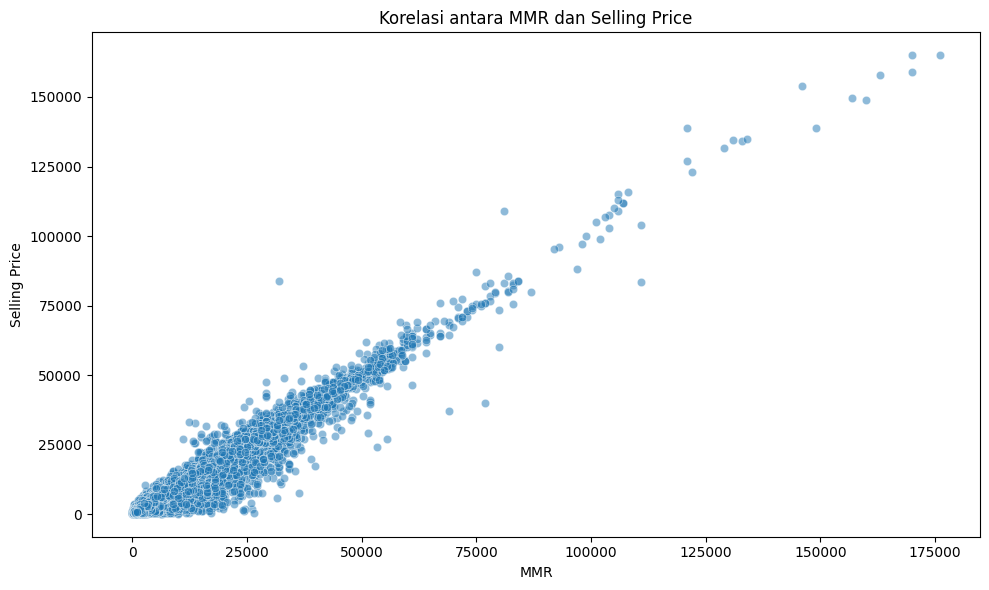

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mmr', y='sellingprice', alpha=0.5)
plt.title('Korelasi antara MMR dan Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()


### 7. Kategori Fair, Underpriced, dan Overpriced (dengan Visualisasi)

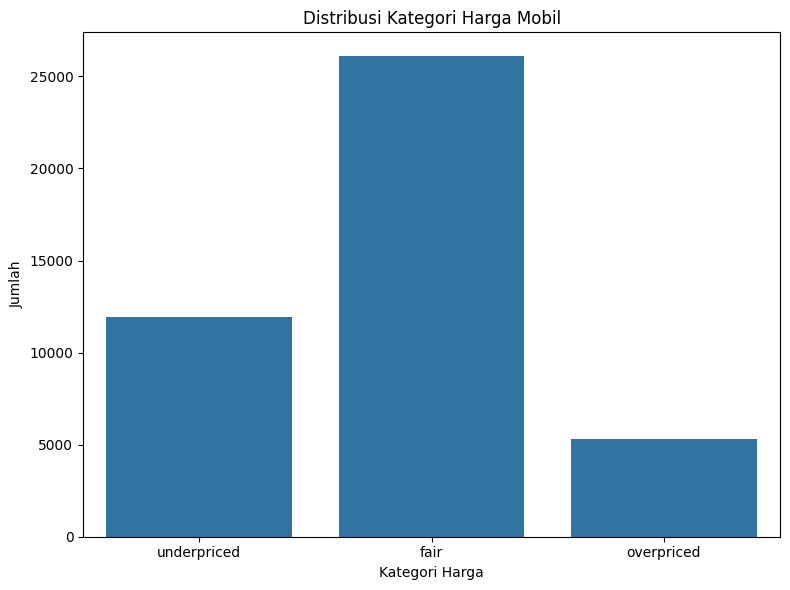

In [68]:
df['price_diff'] = df['sellingprice'] - df['mmr']
df['price_class'] = df['price_diff'].apply(lambda x: 'underpriced' if x < -1000 else 'overpriced' if x > 1000 else 'fair')

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='price_class', order=['underpriced', 'fair', 'overpriced'])
plt.title('Distribusi Kategori Harga Mobil')
plt.ylabel('Jumlah')
plt.xlabel('Kategori Harga')
plt.tight_layout()
plt.show()

### 8. Heatmap Korelasi Fitur Numerik

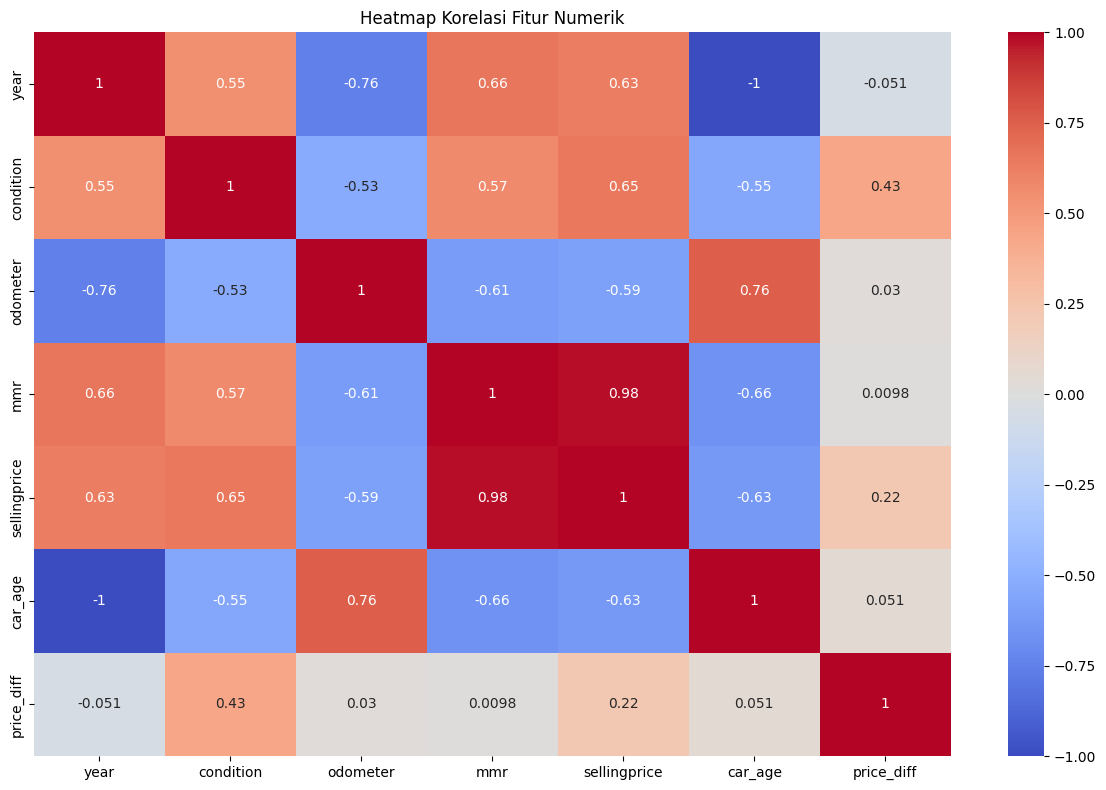

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

### 9. Top 10 Seller untuk Setiap Kategori (Fair, Underpriced, Overpriced)

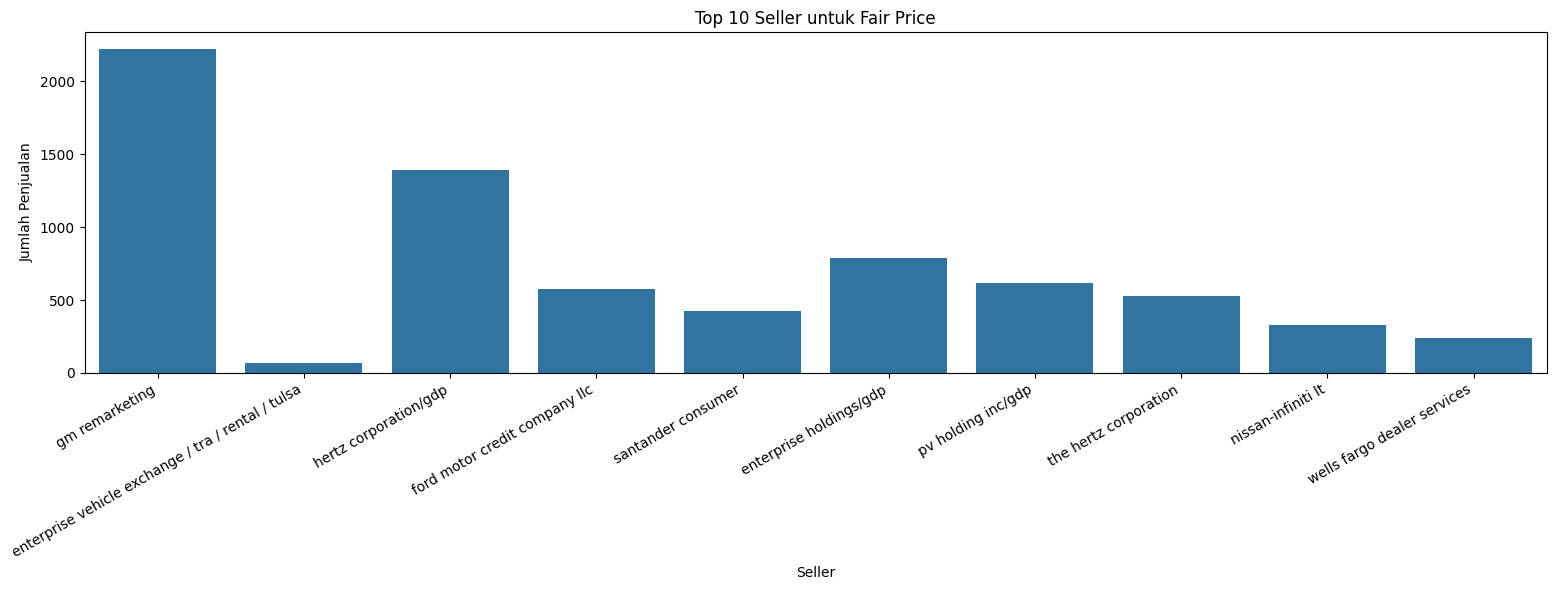

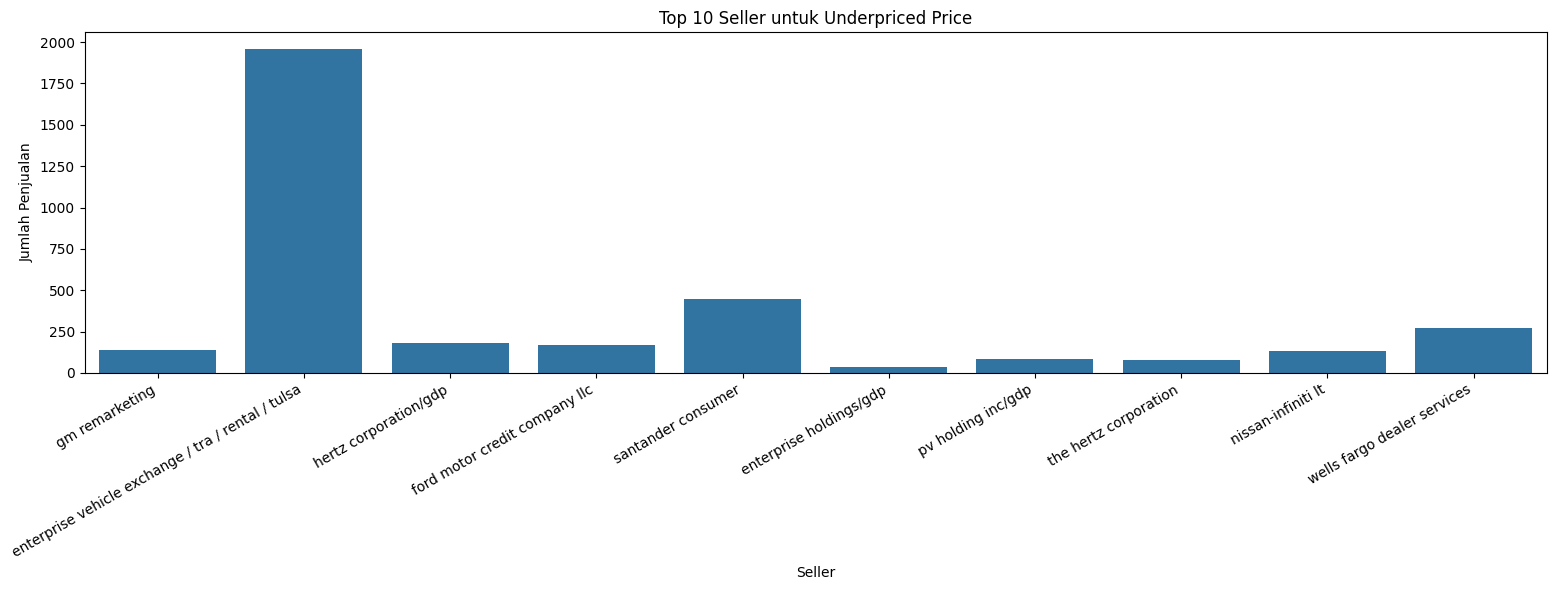

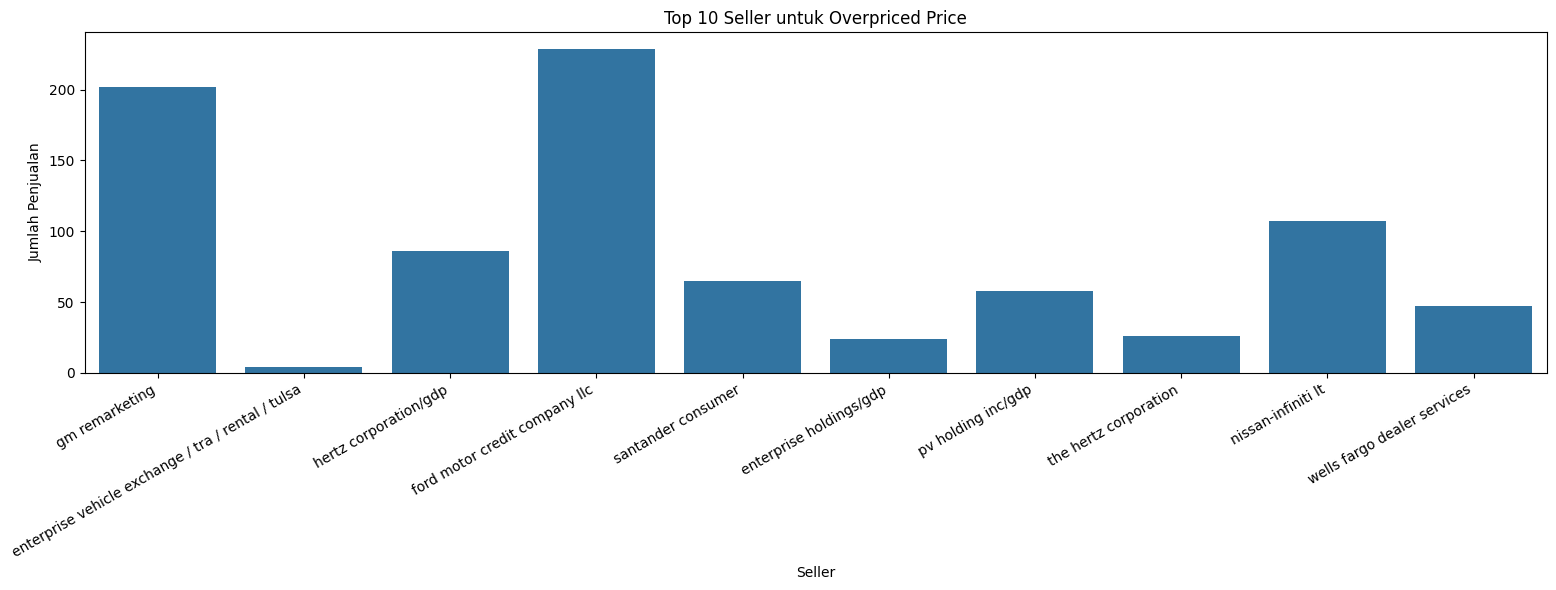

In [70]:
top_sellers = df['seller'].value_counts().head(10).index

for cls in ['fair', 'underpriced', 'overpriced']:
    plt.figure(figsize=(16, 6))  # Lebarkan ukuran figure
    temp = df[df['price_class'] == cls]

    ax = sns.countplot(
        data=temp[temp['seller'].isin(top_sellers)],
        x='seller',
        order=top_sellers
    )

    plt.title(f'Top 10 Seller untuk {cls.capitalize()} Price')
    plt.ylabel('Jumlah Penjualan')
    plt.xlabel('Seller')
    plt.xticks(rotation=30, ha='right', fontsize=10)  # Lebih tegak dan besar
    plt.tight_layout()
    plt.show()


### 10. Frekuensi Fair, Underpriced, Overpriced per Bulan (Line Chart)


/tmp/ipython-input-71-246882404.py:6: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



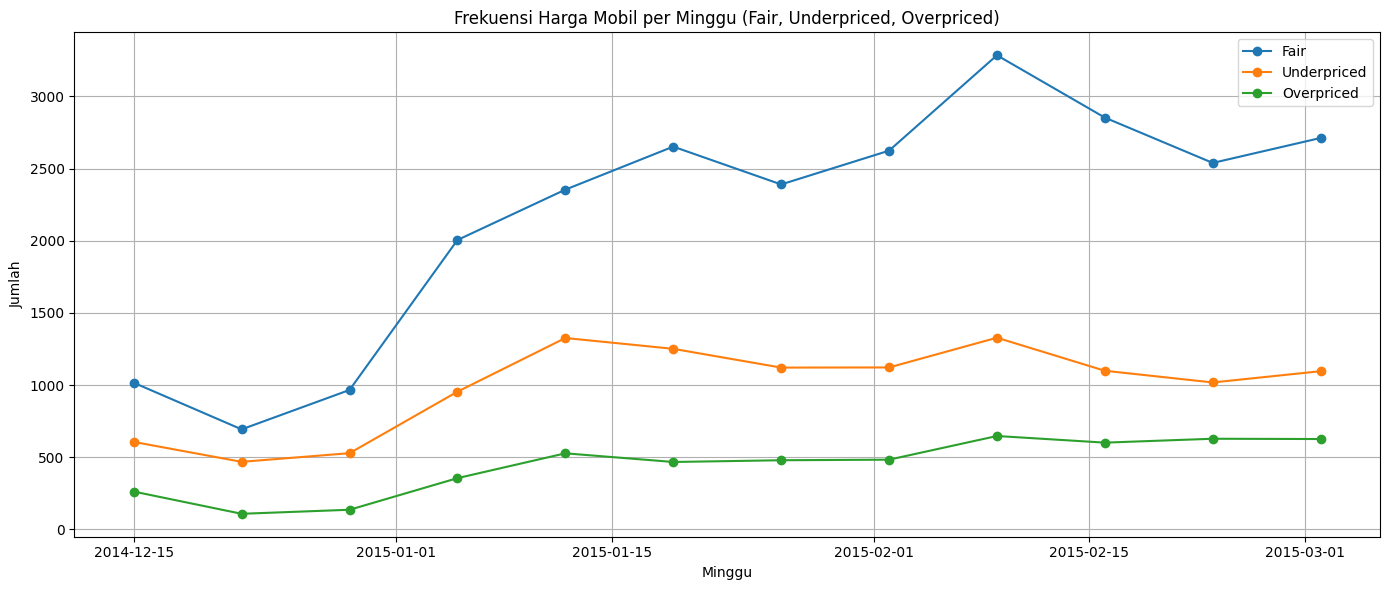

In [71]:
# Pastikan price_class sudah ada
df['price_diff'] = df['sellingprice'] - df['mmr']
df['price_class'] = df['price_diff'].apply(lambda x: 'underpriced' if x < -1000 else 'overpriced' if x > 1000 else 'fair')

# Buat kolom minggu (start of week)
df['week'] = df['saledate'].dt.to_period('W').dt.start_time

# Hitung jumlah per minggu dan per kategori harga
weekly_class = df.groupby(['week', 'price_class']).size().unstack(fill_value=0)

# Plot line chart
plt.figure(figsize=(14, 6))
for cls in ['fair', 'underpriced', 'overpriced']:
    plt.plot(weekly_class.index, weekly_class[cls], marker='o', label=cls.capitalize())

plt.title('Frekuensi Harga Mobil per Minggu (Fair, Underpriced, Overpriced)')
plt.xlabel('Minggu')
plt.ylabel('Jumlah')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 11. Visualisasi car_age, condition, dan odometer terhadap price_class

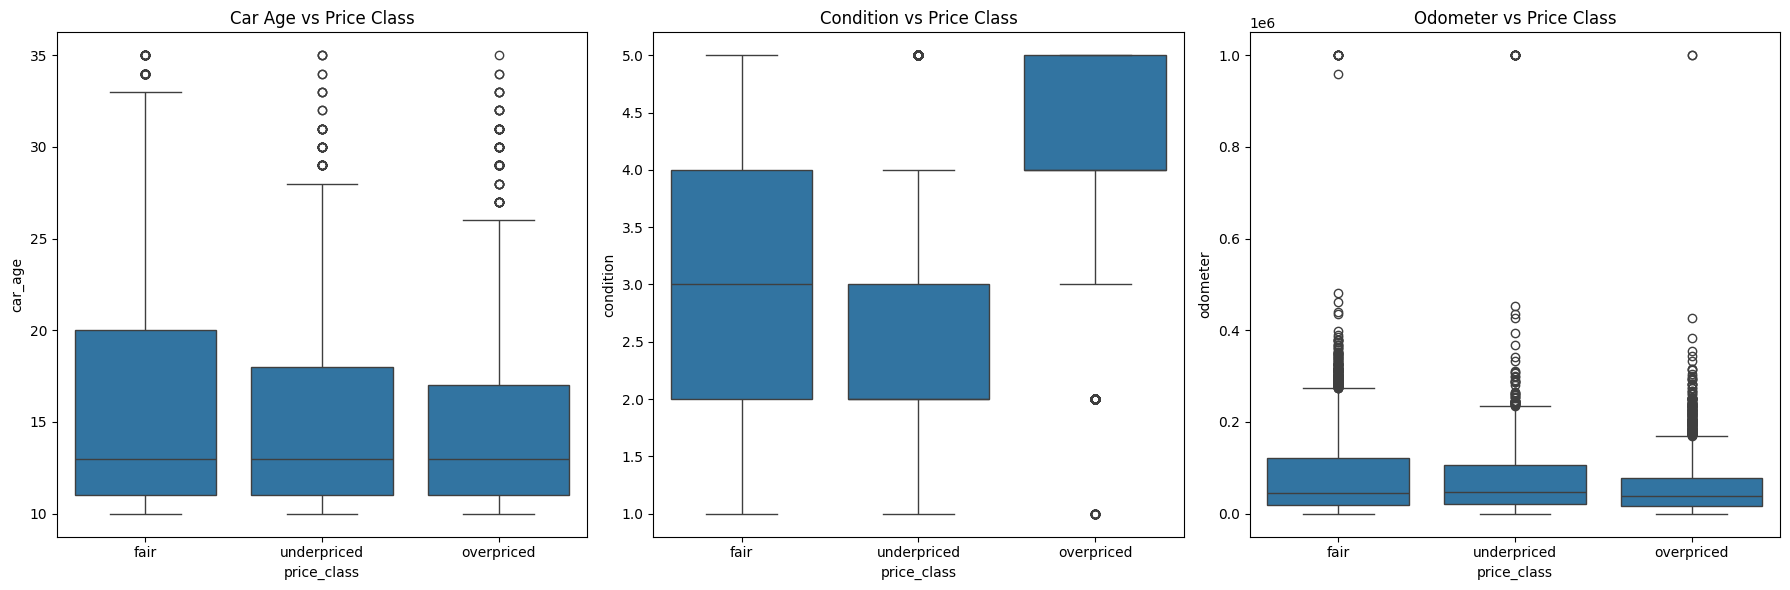

In [72]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=df, x='price_class', y='car_age', ax=axs[0])
sns.boxplot(data=df, x='price_class', y='condition', ax=axs[1])
sns.boxplot(data=df, x='price_class', y='odometer', ax=axs[2])
axs[0].set_title('Car Age vs Price Class')
axs[1].set_title('Condition vs Price Class')
axs[2].set_title('Odometer vs Price Class')
plt.tight_layout()
plt.show()

### 12. Heatmap State untuk Fair, Underpriced, Overpriced

In [73]:
import plotly.express as px

for cls in ['overpriced', 'fair', 'underpriced']:
    state_data = df[df['price_class'] == cls]['state'].value_counts().reset_index()
    state_data.columns = ['state', 'count']
    state_data['state'] = state_data['state'].str.upper()

    fig = px.choropleth(
        state_data,
        locations='state',
        locationmode='USA-states',
        color='count',
        scope='usa',
        title=f'{cls.capitalize()} Price Distribution by State',
        color_continuous_scale='Reds'
    )
    fig.show()


In [74]:
# Pastikan kolom klasifikasi sudah tersedia
df['price_diff'] = df['sellingprice'] - df['mmr']
df['price_class'] = df['price_diff'].apply(lambda x: 'underpriced' if x < -1000 else 'overpriced' if x > 1000 else 'fair')

# Hitung jumlah per kategori harga di setiap state
state_price_class = df.groupby(['state', 'price_class']).size().unstack(fill_value=0)

# Tampilkan 10 baris pertama sebagai contoh
print("Jumlah Penjualan per State berdasarkan Kategori Harga:")
#print(state_price_class.head(10))
display(state_price_class)

Jumlah Penjualan per State berdasarkan Kategori Harga:


price_class,fair,overpriced,underpriced
state,,,
al,1,0,0
az,313,60,169
ca,2951,984,2547
co,366,70,65
fl,4951,807,1517
ga,1184,310,483
hi,43,10,41
il,2221,320,538
in,160,21,256


In [75]:
# Hitung jumlah mobil per state dan kategori harga
state_price_class = df.groupby(['state', 'price_class']).size().unstack(fill_value=0)

# Hitung total penjualan per state
state_price_class['total'] = state_price_class.sum(axis=1)

# Hitung persentase masing-masing kategori
state_price_class['%fair'] = (state_price_class.get('fair', 0) / state_price_class['total']) * 100
state_price_class['%underpriced'] = (state_price_class.get('underpriced', 0) / state_price_class['total']) * 100
state_price_class['%overpriced'] = (state_price_class.get('overpriced', 0) / state_price_class['total']) * 100

# Pilih hanya kolom persentase
state_price_percent = state_price_class[['%fair', '%underpriced', '%overpriced']]

# Tampilkan hasil (contoh 10 baris pertama)
print("Persentase Penjualan per State berdasarkan Kategori Harga:")
print(state_price_percent.round(2))
display(state_price_percent.round(2))

Persentase Penjualan per State berdasarkan Kategori Harga:
price_class   %fair  %underpriced  %overpriced
state                                         
al           100.00          0.00         0.00
az            57.75         31.18        11.07
ca            45.53         39.29        15.18
co            73.05         12.97        13.97
fl            68.05         20.85        11.09
ga            59.89         24.43        15.68
hi            45.74         43.62        10.64
il            72.13         17.47        10.39
in            36.61         58.58         4.81
la            52.80         36.65        10.56
ma            61.07         36.43         2.50
md            58.60         39.20         2.20
mi            61.80         17.68        20.52
mn            76.05         11.58        12.38
mo            66.20         16.67        17.13
ms            50.00         50.00         0.00
nc            67.77         19.38        12.85
ne            54.75         29.86        15.38
n

price_class,%fair,%underpriced,%overpriced
state,,,
al,100.00,0.00,0.00
az,57.75,31.18,11.07
ca,45.53,39.29,15.18
co,73.05,12.97,13.97
fl,68.05,20.85,11.09
ga,59.89,24.43,15.68
hi,45.74,43.62,10.64
il,72.13,17.47,10.39
in,36.61,58.58,4.81


### 13. Visualisasi condition & seller vs price_class

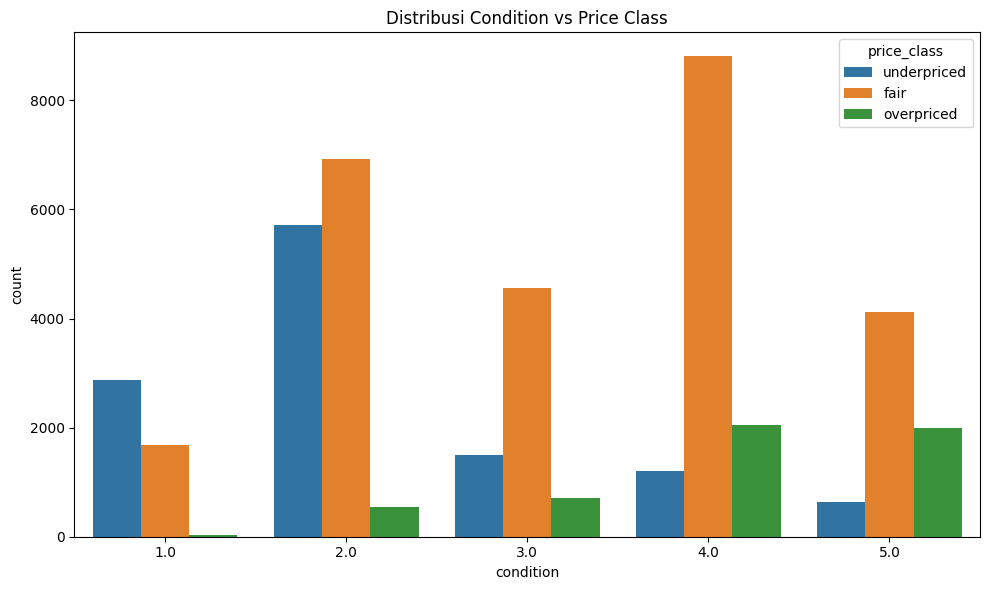

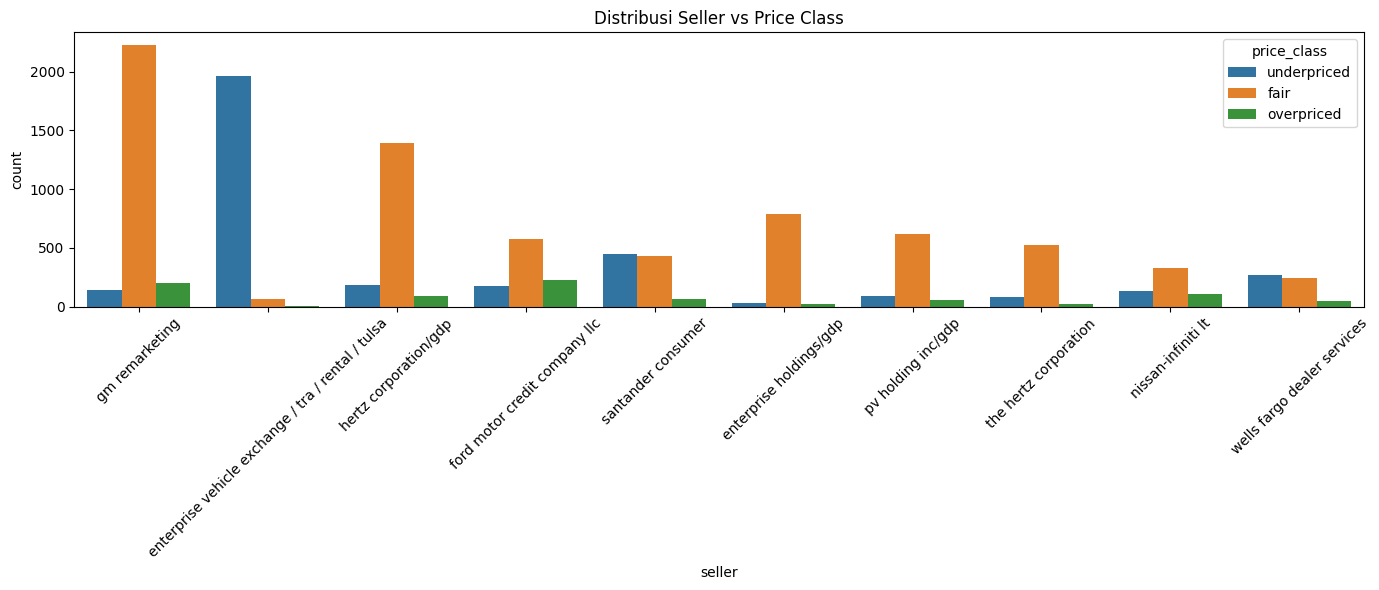

In [76]:
# condition vs price_class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='condition', hue='price_class', order=sorted(df['condition'].unique()))
plt.title('Distribusi Condition vs Price Class')
plt.tight_layout()
plt.show()

# seller vs price_class
top_sellers = df['seller'].value_counts().head(10).index
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['seller'].isin(top_sellers)], x='seller', hue='price_class', order=top_sellers)
plt.title('Distribusi Seller vs Price Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 14. Visualisasi car_age & seller vs price_class


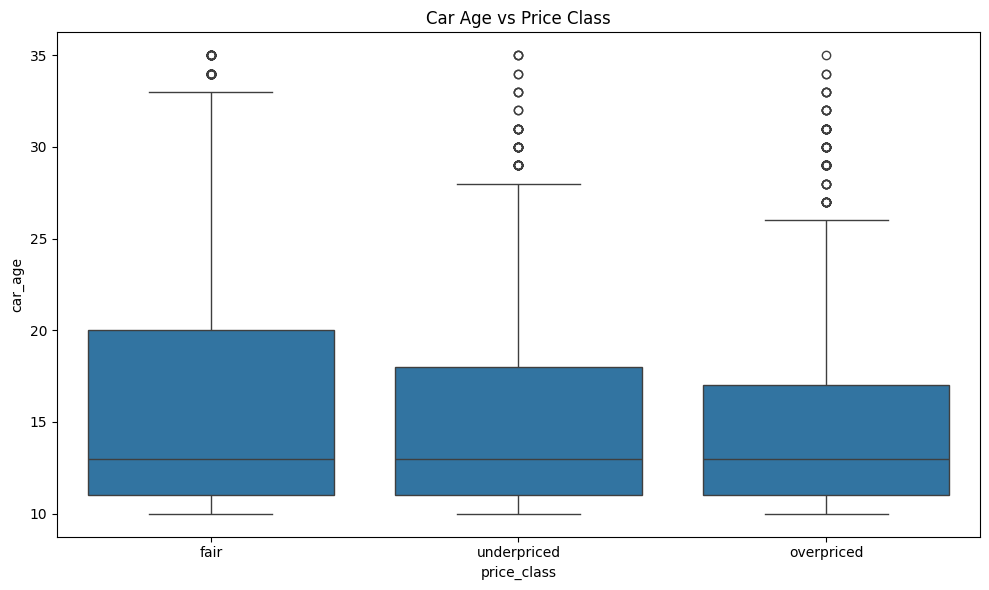

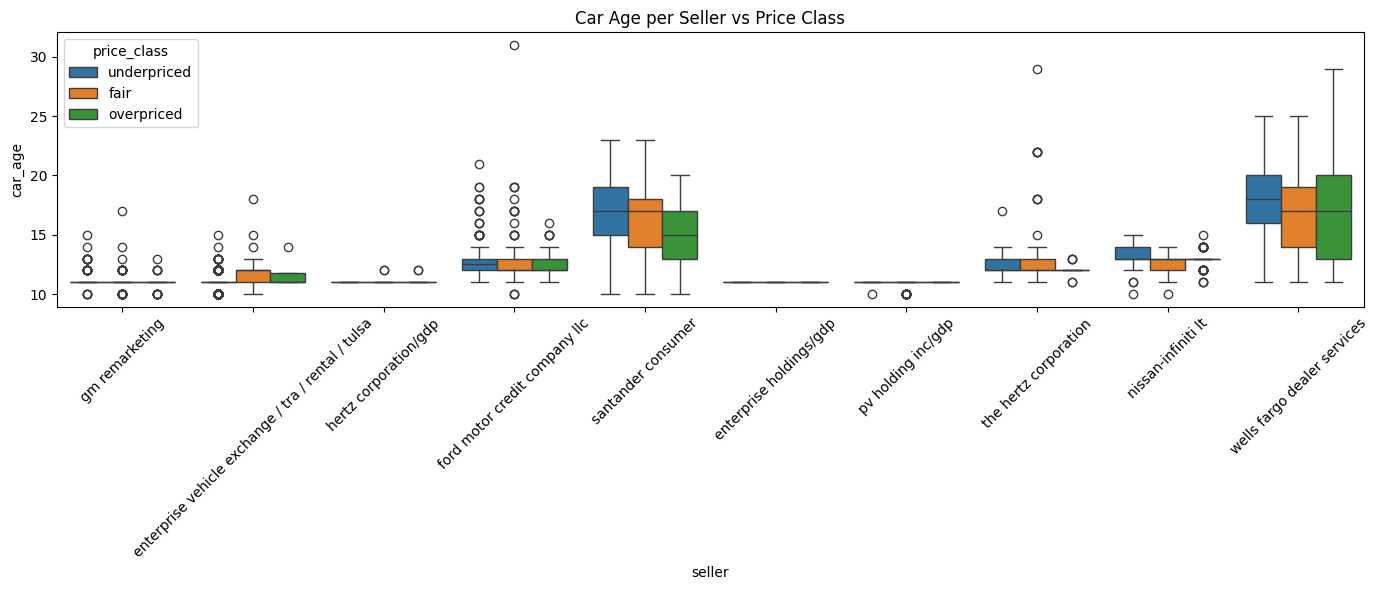

In [77]:
# car_age vs price_class
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price_class', y='car_age')
plt.title('Car Age vs Price Class')
plt.tight_layout()
plt.show()

# seller vs car_age vs price_class
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['seller'].isin(top_sellers)], x='seller', y='car_age', hue='price_class', order=top_sellers)
plt.title('Car Age per Seller vs Price Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# AI Support Classification

In [96]:
# STEP 2: Load Data
import pandas as pd

file_path = '/content/drive/MyDrive/vehicle-sales/car_prices_cleaned.csv'
df = pd.read_csv(file_path)
df_raw = df.copy()
# STEP 3: Buat Label Klasifikasi
def price_label(row):
    if row['sellingprice'] < row['mmr'] * 0.9:
        return 'underpriced'
    elif row['sellingprice'] > row['mmr'] * 1.1:
        return 'overpriced'
    else:
        return 'fair'

df = df.dropna(subset=['mmr', 'sellingprice'])
df['price_category'] = df.apply(price_label, axis=1)

# STEP 4: Pilih Fitur
features = ['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
            'odometer', 'color', 'interior', 'car_age']
target = 'price_category'

df = df[features + [target]].dropna()

# STEP 5: Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[features]
y = df[target]

# Pisahkan fitur numerik dan kategorik
numeric_features = ['year', 'condition', 'odometer', 'car_age']
categorical_features = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Gabungkan dengan model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# STEP 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train Model
clf.fit(X_train, y_train)

# STEP 8: Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fair       0.81      0.85      0.83      6504
  overpriced       0.40      0.15      0.21      1395
 underpriced       0.69      0.80      0.74      3847

    accuracy                           0.75     11746
   macro avg       0.63      0.60      0.59     11746
weighted avg       0.72      0.75      0.73     11746



In [153]:
# STEP 9: Prediksi pada 10 data acak dengan semua fitur + mmr + sellingprice
import numpy as np

# Ambil 10 sampel acak dari data uji
sample_indices = np.random.choice(X_test.index, size=7, replace=False)
sample_data = X_test.loc[sample_indices]
sample_true_labels = y_test.loc[sample_indices]
sample_predictions = clf.predict(sample_data)

# Ambil kembali mmr dan sellingprice dari df_raw (pastikan indeks cocok)
extra_info = df_raw.loc[sample_indices, ['mmr', 'sellingprice']]

# Gabungkan semua informasi
results = sample_data.copy()
results['mmr'] = extra_info['mmr'].values
results['sellingprice'] = extra_info['sellingprice'].values
results['Actual'] = sample_true_labels
results['Predicted'] = sample_predictions

# Tampilkan semua kolom
pd.set_option('display.max_columns', None)
print(results)

       year           make          model         trim       body  \
38815  2013            Kia          Forte           EX      Sedan   
18491  2013      Chevrolet          Sonic           LT  Hatchback   
51819  2014          Dodge  Grand Caravan          SXT    minivan   
21845  2014            BMW       5 Series  535d xDrive      Sedan   
3224   2012          Dodge        Avenger           SE      Sedan   
53106  2013          Dodge           Dart          SXT      sedan   
12799  2002  Mercedes-Benz        C-Class         C320      Sedan   

      transmission  condition  odometer  color interior  car_age      mmr  \
38815    automatic        4.0   32864.0  black    black       12  10500.0   
18491    automatic        2.0   33790.0   gray    black       12   9475.0   
51819    automatic        4.0   18746.0      —    black       11  16950.0   
21845    automatic        5.0    8326.0      —    black       11  53700.0   
3224     automatic        4.0   47435.0   gray    black       